# Funkcijos

In [ ]:
# import's

import csv
import numpy as np

from sklearn.utils import shuffle

import random

import matplotlib.pyplot as plt

In [ ]:
# irisų duomenims
# apibrėžta funkcija, kuri perskaito duomenis iš failo, perrašo reikiamus duomenis į csv failą
# (nes lenviau atskirti stulpelius), tada skaito csv failą po eilutę, prideda x0 stulpelį,
# kurio reikšmės visada 1, kad lengviau būtų apsirašyti kitas funcijas dėl poslinkio w0
# funkcija grazina atskirai duomenis ir klases

def read_and_change_data_iris(inputFile, outputFile):
  with open(inputFile, 'r') as fileInput:
    with open(outputFile, 'w') as fileOutput:
      for row in fileInput:
        if 'Iris-versicolor' in row or 'Iris-virginica' in row:
          modifiedString = row.replace('Iris-versicolor','0').replace('Iris-virginica', '1')
          fileOutput.write(modifiedString)

  inputData = []
  inputLabel = []

  with open(outputFile) as fileInput:
    reader = csv.reader(fileInput, delimiter=',')
    for row in reader:
      inputData.append([float(1), float(row[0]), float(row[1]), float(row[2]), float(row[3])])
      inputLabel.append(float(row[4]))

  return inputData, inputLabel

In [ ]:
# vėžio duomenims
# apibrėžta funkcija, kuri perskaito duomenis iš failo, perrašo reikiamus duomenis į csv failą
# (nes lenviau atskirti stulpelius), tada skaito csv failą po eilutę, vietoje pirmame stulpelyje esančio id,
# įrašoma reikšmė 1, kad lengviau būtų apsirašyti kitas funcijas dėl poslinkio w0
# funkcija grazina atskirai duomenis ir klases

def read_and_change_data_cancer(inputFile, outputFile):
  with open(inputFile, 'r') as fileInput:
    with open(outputFile, 'w') as fileOutput:
      for row in fileInput:
        if '?' not in row :
          fileOutput.write(row)

  inputData = []
  inputLabel = []

  with open(outputFile) as fileInput:
    reader = csv.reader(fileInput, delimiter=',')
    for row in reader:
      input = []
      input.append(float(1))
      for i in range(1, len(row)-1):
        input.append(float(row[i]))
      inputData.append(input)
      label = float(row[len(row)-1])
      if label == 2.0:
        inputLabel.append(0.0)
      if label == 4.0:
        inputLabel.append(1.0)

  return inputData, inputLabel

In [ ]:
# funkcija, kuri atsitiktinai sumaišo duomenis

def shuffle_data(inputData, inputLabel):
  return shuffle(inputData, inputLabel)

In [ ]:
# funkcija, kuri dalina duomenis į mokymo ir testavimo, 80% - 20%

def split_data(data, label):
  split = int(0.8 * len(data))

  dataset = {}

  dataset['train_data'] = data[:split]
  dataset['train_label'] = label[:split]

  dataset['test_data'] = data[split:]
  dataset['test_label'] = label[split:]

  return dataset

In [ ]:
# funkcija kuri sugeneruoja pradinius svorius
# seed naudojamas, kad sugeneruotu vis tuos pačius svorius ir visi bandymai turėtų vienodus svorius

def generate_weights(n):
  weights = []
  random.seed(12)

  for i in range(n):
      x = random.random()
      weights.append(x)

  return weights

In [ ]:
# sigmoidinė aktyvacijos funckija

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# apibrėžta funkcija, kuris skaičiuoja įėjimo reikšmių ir svorių sandaugų
# sumą, prie kurios dar pridedamas poslinkis (poslinkis taip pat sudauginamas
# su x0, kuris visada yra 1)

def calculate_input(input, weights):
  sum = 0
  for i in range(len(weights)):
    sum = sum + input[i]*weights[i]
  return sum

In [ ]:
# funkcija, kuri nubraižo paklaidos ir tikslumo grafikus

def make_plots(error, acc):
  plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)
  plt.plot(error, color = 'red')
  plt.title('Santykinės paklaidos grafikas')
  plt.xlabel('Epochų skaičius')
  plt.ylabel('Santykinė paklaida')
  plt.ylim(0.0, 1.0)

  plt.subplot(1, 2, 2)
  plt.plot(acc, color = 'blue')
  plt.title('Tikslumo grafikas')
  plt.xlabel('Epochų skaičius')
  plt.ylabel('Tikslumas')
  plt.ylim(0.0, 1.0)

  plt.tight_layout()
  plt.show()

In [ ]:
# apmokomas sigmoidinis neuronas naudojant paketinį gradientinį nusileidimą
# mokomas su mokymo duomenimis, nustatant epochų skaičių, mokymosi greitį ir svorius

def train(input, labels, epochs, learning_rate, weights):
  all_error = []
  all_accuracy = []

  m = len(input)
  n = len(input[0])

  for epoch in range(epochs):
    gradientSum = [0 for element in range(n)]
    totalError = []
    predicted_labels = []

    for i in range(m):
      y = sigmoid(calculate_input(input[i], weights))
      for k in range(n):
        gradientSum[k] = gradientSum[k] + y*(y-labels[i])*(1-y)*input[i][k]
      error = pow((labels[i]-y), 2)
      totalError.append(error)
      predicted_labels.append(round(y))

    for k in range(n):
      weights[k] = weights[k] - learning_rate*(gradientSum[k]/m)

    accuracy = np.sum(np.array(labels) == np.array(predicted_labels)) / len(labels)
    all_accuracy.append(accuracy)

    all_error.append(np.mean(totalError))

  return all_error, all_accuracy, weights

In [ ]:
# testuojamas apmokytas modelis su testavimo duomenimis
# gražinamos tikslumo ir santykinės paklaidos reikšmės
# bei modelio įvertintos klasės

def test(input, labels, weights):
  m = len(input)
  totalError = []
  predicted_labels = []

  for i in range(m):
    y = sigmoid(calculate_input(input[i], weights))
    error = pow((labels[i]-y), 2)
    totalError.append(error)
    predicted_labels.append(round(y))

  accuracy = np.sum(np.array(labels) == np.array(predicted_labels)) / len(labels)
  error = np.mean(totalError)

  return error, accuracy, predicted_labels

In [ ]:
def test_while_training(input_train, labels_train, input_test, labels_test, epochs, learning_rate, weights, acc):
  all_error = []
  all_accuracy = []

  m = len(input_train)
  n = len(input_train[0])

  for epoch in range(epochs):
    gradientSum = [0 for element in range(n)]
    totalError = []
    predicted_labels = []

    for i in range(m):
      y = sigmoid(calculate_input(input_train[i], weights))
      for k in range(n):
        gradientSum[k] = gradientSum[k] + y*(y-labels_train[i])*(1-y)*input_train[i][k]
      error = pow((labels_train[i]-y), 2)
      totalError.append(error)
      predicted_labels.append(round(y))

    for k in range(n):
      weights[k] = weights[k] - learning_rate*(gradientSum[k]/m)

    accuracy = np.sum(np.array(labels_train) == np.array(predicted_labels)) / len(labels_train)
    all_accuracy.append(accuracy)

    all_error.append(np.mean(totalError))

    error_test, accuracy_test, predicted_labels_test = test(input_test, labels_test, weights)

    if accuracy_test >= acc:
      break

  return all_error, all_accuracy, weights, error_test, accuracy_test, predicted_labels_test, epoch

# Modelio veikimas su irisų duomenimis

In [ ]:
# pasiruošiami irisų duomenys

inputFileIris = 'iris.data'
outputFileIris = 'iris.csv'

inputDataIris, inputLabelIris = read_and_change_data_iris(inputFileIris, outputFileIris)
inputDataIris, inputLabelIris = shuffle_data(inputDataIris, inputLabelIris)
dataset_iris = split_data(inputDataIris, inputLabelIris)

print('Iris duomenų pasiskirstymas:')
print('   mokymo duomenų yra {}, iš jų 0 klasės: {}, 1 klasės: {}'.format(len(dataset_iris['train_data']),
                                                                       np.sum(np.array(dataset_iris['train_label']) == 0),
                                                                       np.sum(np.array(dataset_iris['train_label']) == 1)))
print('   testavimo duomenų yra {}, iš jų 0 klasės: {}, 1 klasės: {}'.format(len(dataset_iris['test_data']),
                                                                       np.sum(np.array(dataset_iris['test_label']) == 0),
                                                                       np.sum(np.array(dataset_iris['test_label']) == 1)))

Iris duomenų pasiskirstymas:
   mokymo duomenų yra 80, iš jų 0 klasės: 39, 1 klasės: 41
   testavimo duomenų yra 20, iš jų 0 klasės: 11, 1 klasės: 9


In [ ]:
# susigeneruojami pradiniai svoriai

generated_weights_iris = generate_weights(len(dataset_iris['train_data'][0]))
print('Sugeneruoti pradiniai svoriai:', generated_weights_iris)

Sugeneruoti pradiniai svoriai: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795]


In [ ]:
# modelio mokymas

learning_rate = 0.9
epochs = 300

error_iris, acc_iris, weights_iris = train(dataset_iris['train_data'], dataset_iris['train_label'], epochs, learning_rate, generated_weights_iris.copy())
make_plots(error_iris, acc_iris)

In [ ]:
# modelio testavimas su gautais svoriais

error_test, acc_test, pred_labels = test(dataset_iris['test_data'], dataset_iris['test_label'], weights_iris)

print('Testavimo metu gautos reikšmmės:')
print('   santykinės paklaidos:', error_test)
print('   tikslumo:', acc_test)

In [ ]:
print('Galutiniai modelio svoriai:', weights_iris)

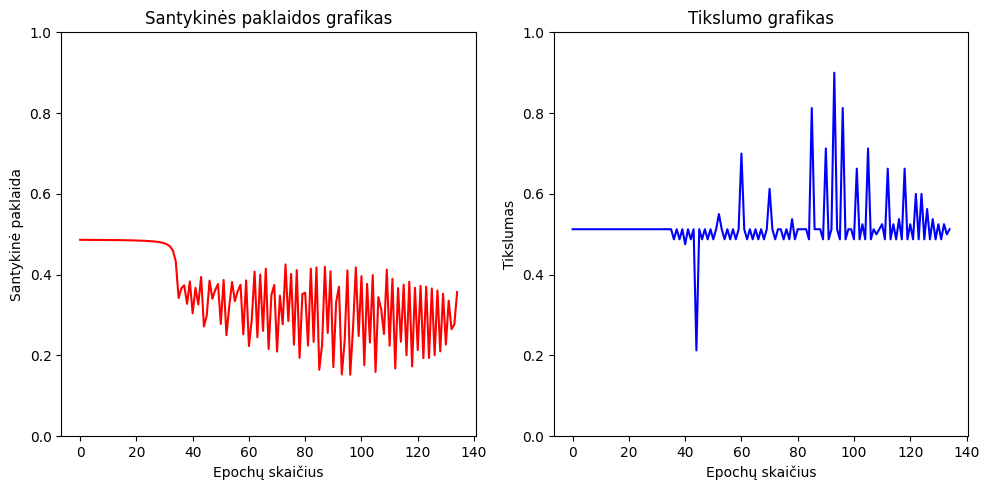

Kai mokymosi greitis 0.9 :
Modelis mokėsi 135 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.3571
   tikslumo: 0.51
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.1285
   tikslumo: 1.0
Galutiniai modelio svoriai: [-0.146004, -1.147068, -0.550037, 1.391348, 1.278834]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.9
epochs = 300

error_iris, acc_iris, weights_iris, error_test_iris, acc_test_iris, pred_labels_iris, epochs_last = test_while_training(dataset_iris['train_data'], dataset_iris['train_label'], dataset_iris['test_data'], dataset_iris['test_label'], epochs, learning_rate, generated_weights_iris.copy(), 0.95)

make_plots(error_iris, acc_iris)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_iris[-1], 4))
print('   tikslumo:', round(acc_iris[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_iris, 4))
print('   tikslumo:', round(acc_test_iris, 2))
print('Galutiniai modelio svoriai:',  [round(item,6) for item in weights_iris])

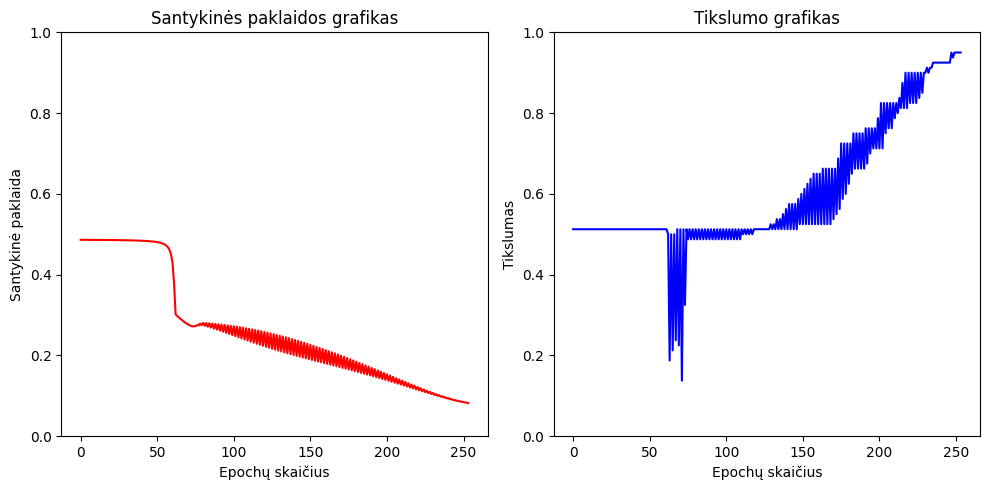

Kai mokymosi greitis 0.5 :
Modelis mokėsi 254 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.0821
   tikslumo: 0.95
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.1207
   tikslumo: 0.95
Galutiniai modelio svoriai: [-0.273141, -1.226686, -0.797903, 1.652268, 1.465409]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.5
epochs = 300

error_iris, acc_iris, weights_iris, error_test_iris, acc_test_iris, pred_labels_iris, epochs_last = test_while_training(dataset_iris['train_data'], dataset_iris['train_label'], dataset_iris['test_data'], dataset_iris['test_label'], epochs, learning_rate, generated_weights_iris.copy(), 0.95)

make_plots(error_iris, acc_iris)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_iris[-1], 4))
print('   tikslumo:', round(acc_iris[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_iris, 4))
print('   tikslumo:', round(acc_test_iris, 2))
print('Galutiniai modelio svoriai:',  [round(item,6) for item in weights_iris])

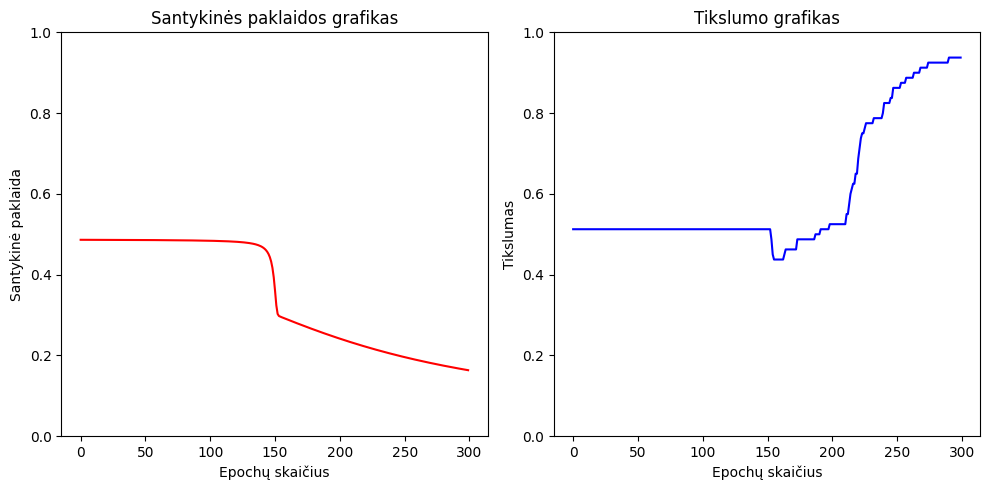

Kai mokymosi greitis 0.2 :
Modelis mokėsi 300 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.1635
   tikslumo: 0.94
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.1868
   tikslumo: 0.95
Galutiniai modelio svoriai: [0.088056, -0.543358, -0.153773, 0.594058, 0.580168]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.2
epochs = 300

error_iris, acc_iris, weights_iris, error_test_iris, acc_test_iris, pred_labels_iris, epochs_last = test_while_training(dataset_iris['train_data'], dataset_iris['train_label'], dataset_iris['test_data'], dataset_iris['test_label'], epochs, learning_rate, generated_weights_iris.copy(), 0.99)

make_plots(error_iris, acc_iris)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_iris[-1], 4))
print('   tikslumo:', round(acc_iris[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_iris, 4))
print('   tikslumo:', round(acc_test_iris, 2))
print('Galutiniai modelio svoriai:',  [round(item,6) for item in weights_iris])

# Modelio veikimas su vėžio duomenimis

In [ ]:
# paruošiami vėžio duomenys

inputFileCancer = 'breast-cancer-wisconsin.data'
outputFileCancer = 'breast-cancer-wisconsin.csv'

inputDataCancer, inputLabelCancer = read_and_change_data_cancer(inputFileCancer, outputFileCancer)
print('iš viso:', len(inputLabelCancer))
print('0 klasės', len(inputLabelCancer) - np.sum(inputLabelCancer))
print('1 klasės', np.sum(inputLabelCancer))
inputDataCancer, inputLabelCancer = shuffle_data(inputDataCancer, inputLabelCancer)
dataset_cancer = split_data(inputDataCancer, inputLabelCancer)

print('Vėžio duomenų pasiskirstymas:')
print('   mokymo duomenų yra {}, iš jų 0 klasės: {}, 1 klasės: {}'.format(len(dataset_cancer['train_data']),
                                                                       np.sum(np.array(dataset_cancer['train_label']) == 0),
                                                                       np.sum(np.array(dataset_cancer['train_label']) == 1)))
print('   testavimo duomenų yra {}, iš jų 0 klasės: {}, 1 klasės: {}'.format(len(dataset_cancer['test_data']),
                                                                       np.sum(np.array(dataset_cancer['test_label']) == 0),
                                                                       np.sum(np.array(dataset_cancer['test_label']) == 1)))

iš viso: 683
0 klasės 444.0
1 klasės 239.0
Vėžio duomenų pasiskirstymas:
   mokymo duomenų yra 546, iš jų 0 klasės: 359, 1 klasės: 187
   testavimo duomenų yra 137, iš jų 0 klasės: 85, 1 klasės: 52


In [ ]:
# susigeneruojami pradiniai svoriai

generated_weights_cancer = generate_weights(len(dataset_cancer['train_data'][0]))
print('Sugeneruoti pradiniai svoriai:', generated_weights_cancer)

Sugeneruoti pradiniai svoriai: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795, 0.3747544920633644, 0.2740481394783314, 0.8103480522350838, 0.6905926530386846, 0.6014570387277332]


In [ ]:
# modelio mokymas ir testavimas po to

learning_rate = 0.9
epochs = 500

error_cancer, acc_cancer, weights_cancer = train(dataset_cancer['train_data'], dataset_cancer['train_label'], epochs, learning_rate, generated_weights_cancer.copy())
make_plots(error_cancer, acc_cancer)

error_test_cancer, acc_test_cancer, pred_labels_cancer = test(dataset_cancer['test_data'], dataset_cancer['test_label'], weights_cancer)

print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_cancer[-1], 4))
print('   tikslumo:', round(acc_cancer[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_cancer, 4))
print('   tikslumo:', round(acc_test_cancer, 2))

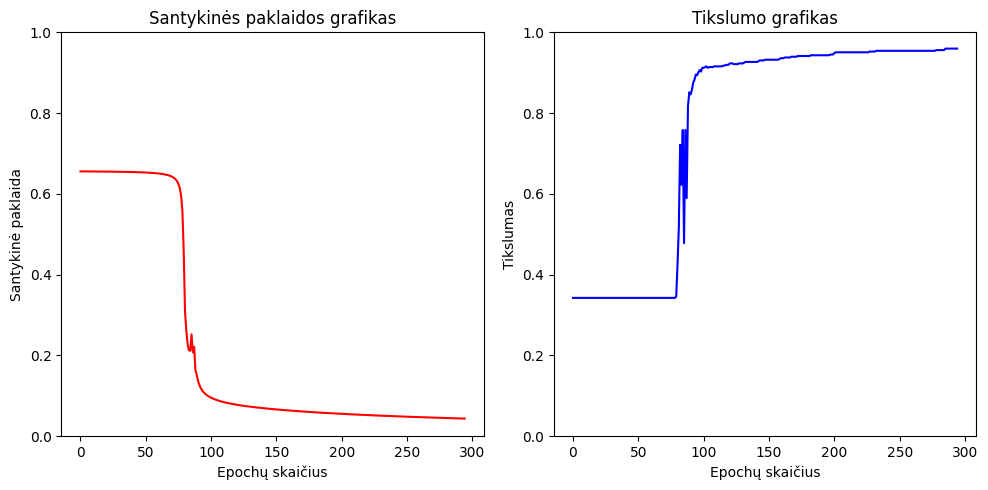

Kai mokymosi greitis 0.9 :
Modelis mokėsi 295 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.0437
   tikslumo: 0.96
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.0484
   tikslumo: 0.96
Galutiniai modelio svoriai: [-2.288566, -0.110971, 0.639521, 0.241954, 0.140241, -0.458733, 0.480063, -0.281596, 0.276253, -0.165658]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.9
epochs = 500

error_cancer, acc_cancer, weights_cancer, error_test_cancer, acc_test_cancer, pred_labels_cancer, epochs_last = test_while_training(dataset_cancer['train_data'], dataset_cancer['train_label'], dataset_cancer['test_data'], dataset_cancer['test_label'], epochs, learning_rate, generated_weights_cancer.copy(), 0.95)

make_plots(error_cancer, acc_cancer)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_cancer[-1], 4))
print('   tikslumo:', round(acc_cancer[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_cancer, 4))
print('   tikslumo:', round(acc_test_cancer, 2))
print('Galutiniai modelio svoriai:', [round(item,6) for item in weights_cancer])

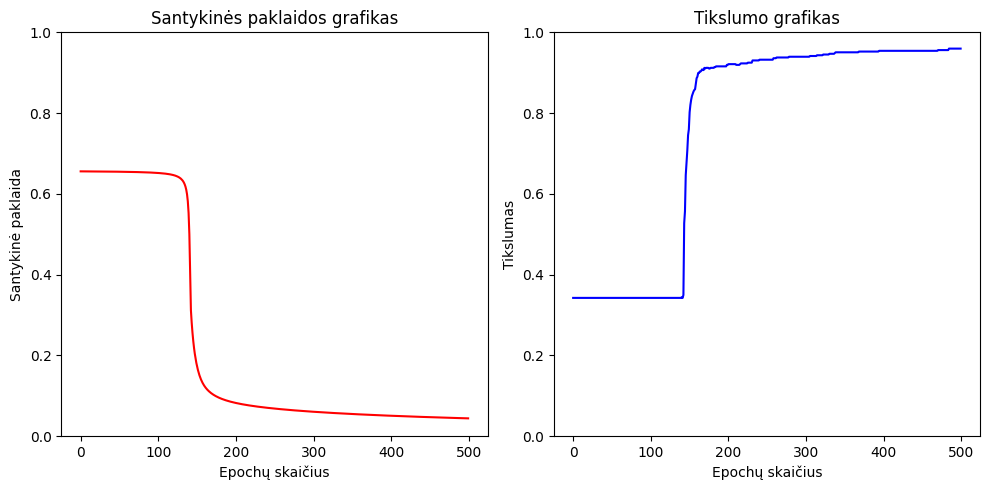

Kai mokymosi greitis 0.5 :
Modelis mokėsi 500 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.0442
   tikslumo: 0.96
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.0493
   tikslumo: 0.95
Galutiniai modelio svoriai: [-2.233629, -0.112503, 0.620296, 0.242081, 0.139181, -0.440859, 0.469812, -0.280865, 0.270574, -0.168845]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.5
epochs = 500

error_cancer, acc_cancer, weights_cancer, error_test_cancer, acc_test_cancer, pred_labels_cancer, epochs_last = test_while_training(dataset_cancer['train_data'], dataset_cancer['train_label'], dataset_cancer['test_data'], dataset_cancer['test_label'], epochs, learning_rate, generated_weights_cancer.copy(), 0.95)

make_plots(error_cancer, acc_cancer)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_cancer[-1], 4))
print('   tikslumo:', round(acc_cancer[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_cancer, 4))
print('   tikslumo:', round(acc_test_cancer, 2))
print('Galutiniai modelio svoriai:', [round(item,6) for item in weights_cancer])

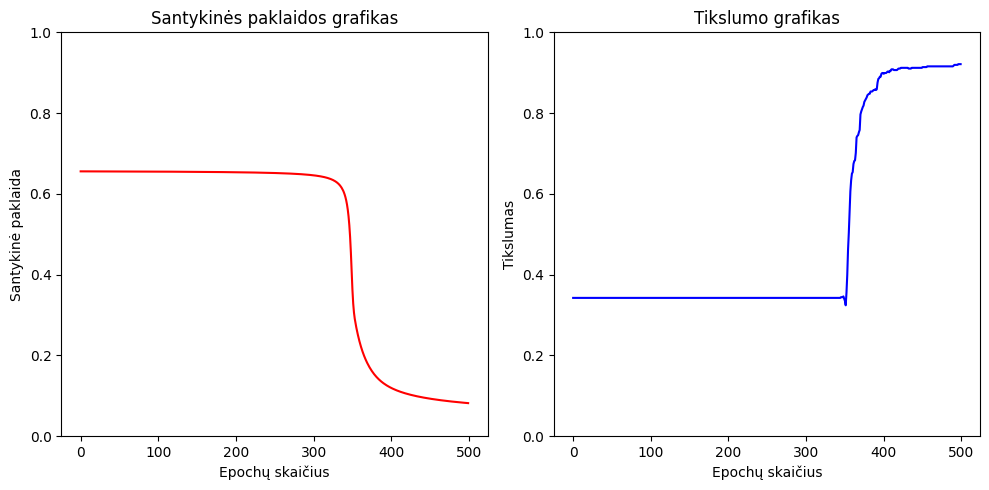

Kai mokymosi greitis 0.2 :
Modelis mokėsi 500 epochų.
Paskutinio mokymosi metu gautos reikšmės:
   santykinės paklaidos: 0.082
   tikslumo: 0.92
Testavimo metu gautos reikšmės:
   santykinės paklaidos: 0.0925
   tikslumo: 0.91
Galutiniai modelio svoriai: [-0.690871, -0.248449, 0.591359, 0.142127, 0.011771, -0.610257, 0.508099, -0.230479, 0.273442, -0.117931]


In [ ]:
# modelio mokymas ir testavimas mokant, kad modelis nepersimokytu

learning_rate = 0.2
epochs = 500

error_cancer, acc_cancer, weights_cancer, error_test_cancer, acc_test_cancer, pred_labels_cancer, epochs_last = test_while_training(dataset_cancer['train_data'], dataset_cancer['train_label'], dataset_cancer['test_data'], dataset_cancer['test_label'], epochs, learning_rate, generated_weights_cancer.copy(), 0.95)

make_plots(error_cancer, acc_cancer)
print('Kai mokymosi greitis', learning_rate, ":")
print('Modelis mokėsi', epochs_last+1, 'epochų.')
print('Paskutinio mokymosi metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_cancer[-1], 4))
print('   tikslumo:', round(acc_cancer[-1], 2))
print('Testavimo metu gautos reikšmės:')
print('   santykinės paklaidos:', round(error_test_cancer, 4))
print('   tikslumo:', round(acc_test_cancer, 2))
print('Galutiniai modelio svoriai:', [round(item,6) for item in weights_cancer])

In [ ]:
for i in range(len(pred_labels_cancer)):
  print(i+1, '&', int(dataset_cancer['test_label'][i]), '&', pred_labels_cancer[i], ' \\\ \hline')